# Cellular Automata

Cellular Automata are computational models consisting of a grid of cells, where each cell evolves based on predefined rules. In the context of Constructor Theory, you can model each **cell** as a substrate and the **rules** governing the evolution of the cellular automaton as tasks that constructors perform on those substrates.

Here's how you can model this:

### **1. Mapping Cellular Automata to Constructor Theory**

- **Cells as Substrates**: Each cell in the grid of the cellular automaton is a substrate. The state of a cell (e.g., `alive` or `dead` in Conway's Game of Life) represents the substrate's state.
- **Rules as Tasks**: The transition rules that determine how a cell evolves based on its neighbors can be modeled as tasks. A task in this case would change the state of a cell based on the states of neighboring cells.
- **Constructor**: The constructor is responsible for applying the rules (tasks) to each cell in the grid. The constructor iterates through the grid, applying the rules at each time step.

### **2. Example: Conway's Game of Life**

Let’s blend Constructor Theory with **Conway’s Game of Life**, a well-known example of cellular automata.

In Conway’s Game of Life:

- A cell can be in one of two states: `alive` or `dead`.
- The state of a cell at the next time step depends on the states of its 8 neighbors.
    - **Alive** cells with fewer than 2 or more than 3 live neighbors die.
    - **Dead** cells with exactly 3 live neighbors become alive.

We’ll model this using your Constructor Theory library.

### **Step 1: Define the Cell as a Substrate**

Each cell in the grid can be a substrate, with its state either `alive` or `dead`.

In [7]:
from constructor import Task, Substrate, Constructor, Condition

In [8]:
class Cell(Substrate):
    def __init__(self, state="dead"):
        """
        Initialize a cell with its state.

        :param state: State of the cell, either "alive" or "dead".
        """
        super().__init__(state=state, name="Cell")


### **Step 2: Define the Task (Rules for Cell Evolution)**

Each rule in Conway’s Game of Life is a task that takes into account the state of neighboring cells and changes the state of the current cell.

In [9]:
class GameOfLife(Task):
    def __init__(self, rule_name):
        super().__init__(name=rule_name)

    def execute(self, cell, neighbors):
        """
        Perform the task of applying Game of Life rules to a cell.

        :param cell: The cell to apply the rule to.
        :param neighbors: List of neighboring cells.
        :return: The new state of the cell.
        """
        alive_neighbors = sum(1 for neighbor in neighbors if neighbor.state == "alive")

        if cell.state == "alive":
            if alive_neighbors < 2 or alive_neighbors > 3:
                return "dead"  # Cell dies due to under/overpopulation
        else:
            if alive_neighbors == 3:
                return "alive"  # Cell becomes alive through reproduction

        return cell.state  # No change

### **Step 3: Define the Constructor (Engine for Rule Application)**

The constructor iterates through the grid, applying the rules to each cell. This is the entity that performs the task of updating each cell based on its neighbors.

In [10]:
class Automaton(Constructor):
    def __init__(self, name, capabilities):
        """
        Initialize the constructor for applying cellular automata rules.

        :param name: Name of the constructor.
        :param capabilities: List of tasks the constructor can perform.
        """
        super().__init__(name=name, capabilities=capabilities)

    # @Constructor.execute
    def perform(self, task, grid):
        """
        Perform the task (apply rules) to all cells in the grid.

        :param task: The rule to apply.
        :param grid: The grid of cells (2D list).
        """
        rows = len(grid)
        cols = len(grid[0])

        # Create a copy of the grid to store the next state
        next_grid = [[Cell() for _ in range(cols)] for _ in range(rows)]

        # Iterate through each cell
        for i in range(rows):
            for j in range(cols):
                # Get the current cell's neighbors
                neighbors = self.get_neighbors(grid, i, j)
                # Apply the task (rule) to determine the new state
                new_state = task.execute(grid[i][j], neighbors)
                next_grid[i][j].state = new_state

        return next_grid

    def get_neighbors(self, grid, row, col):
        """
        Get the neighboring cells of a given cell in the grid.

        :param grid: The grid of cells.
        :param row: Row index of the cell.
        :param col: Column index of the cell.
        :return: List of neighboring cells.
        """
        neighbors = []
        rows = len(grid)
        cols = len(grid[0])

        # Check 8 possible neighbors (including diagonal)
        for i in [-1, 0, 1]:
            for j in [-1, 0, 1]:
                if not (i == 0 and j == 0):  # Skip the cell itself
                    new_row, new_col = row + i, col + j
                    if 0 <= new_row < rows and 0 <= new_col < cols:
                        neighbors.append(grid[new_row][new_col])

        return neighbors


### **Step 4: Run the Simulation**

Now we can define a grid of cells, initialize the constructor, and apply the rules to evolve the automaton over multiple generations.

### **Explanation**:

1. **Substrates (Cells)**: Each cell is a substrate with a state (`"alive"` or `"dead"`).
2. **Tasks (Rules)**: The tasks define how each cell evolves based on its neighbors' states. These are Conway’s Game of Life rules.
3. **Constructor**: The constructor (`Life Engine`) applies the rules to the entire grid at each time step, updating the grid to the next generation.

In [11]:
import random

def create_dynamic_centered_grid(Y, alive_fraction=0.1):
    """
    Creates a YxY grid with dynamically determined alive cells centered in the grid.
    
    Args:
    - Y: The size of the grid (YxY).
    - alive_fraction: The fraction of the grid cells that should be alive (default is 10%).
    
    Returns:
    - A YxY grid with the dynamically determined alive cells centered.
    """
    # Initialize a YxY grid with all cells dead
    grid = [[Cell("dead") for _ in range(Y)] for _ in range(Y)]
    
    # Determine the number of alive cells based on the alive_fraction
    total_cells = Y * Y
    num_alive_cells = int(total_cells * alive_fraction)
    
    # Define the bounds for the central region where alive cells will be placed
    center_row, center_col = Y // 2, Y // 2
    central_region_size = max(3, Y // 4)  # Minimum size of the central region is 3x3 or a fraction of Y
    
    # Calculate the start and end positions of the central region
    start_row = max(0, center_row - central_region_size // 2)
    start_col = max(0, center_col - central_region_size // 2)
    end_row = min(Y, center_row + central_region_size // 2 + 1)
    end_col = min(Y, center_col + central_region_size // 2 + 1)
    
    # Generate all possible positions in the central region
    possible_positions = [(row, col) for row in range(start_row, end_row) for col in range(start_col, end_col)]
    
    # Randomly select positions for the alive cells without replacement
    alive_cells = random.sample(possible_positions, min(num_alive_cells, len(possible_positions)))
    
    # Set the chosen positions to "alive" in the grid
    for row, col in alive_cells:
        grid[row][col].state = "alive"
    
    return grid


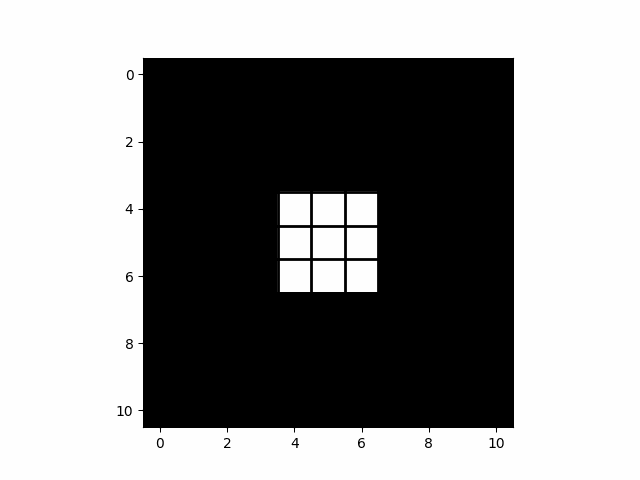

In [13]:
from constructor.util import (
    save_grid_image_to_memory,
    create_gif_in_memory,
    display_gif_in_notebook,
)

grid = create_dynamic_centered_grid(11, alive_fraction=0.2)  # 20% of cells in the central region will be alive

# Define the Game of Life task
game_of_life_task = GameOfLife(rule_name="Conway's Game of Life")

# Define the constructor
automaton_constructor = Automaton(name="Life Engine", capabilities=[game_of_life_task])

# Number of generations for the simulation
num_generations = 15
image_frames = []

# Run the simulation and store images in memory for each generation
for generation in range(num_generations):
    img = save_grid_image_to_memory(grid)  # Save image of current grid to memory
    image_frames.append(img)
    grid = automaton_constructor.perform(game_of_life_task, grid)

# Create GIF in memory
gif_data = create_gif_in_memory(image_frames)

# Display the GIF in the notebook
display_gif_in_notebook(gif_data)